In [1]:
!pip install seaborn==0.9.0 
!pip install matplotlib==1.4.3
!pip install duration

In [0]:
import pandas as pd
from duration import (
    to_seconds
)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(f"Seaborn {sns.__version__}, Pandas {pd.__version__}")

Seaborn 0.9.0, Pandas 0.22.0


In [0]:
dfs = pd.read_html('classic.html')[0]

In [0]:
df = dfs.drop(columns=['Nome', 'Clube/ Equipe'])

In [40]:
df.head()

,Col,Num,Sx,Cat,Tempo Oficial:,Col.Cat
0,1.0,2556,M,VENC.M,00:26:36,1
1,2.0,2127,M,VENC.M,00:27:04,2
2,3.0,2158,M,VENC.M,00:27:37,3
3,4.0,2131,M,M30/34,00:27:48,1
4,5.0,2300,M,M14/16,00:27:51,1


In [0]:
time = df.head(1)['Tempo Oficial:'][0]
seconds = to_seconds(time, strict=False) # 91405

In [42]:
seconds, time

(1596, '00:26:36')

In [43]:
df.shape

(496, 6)

In [44]:
52*60 + 12

3132

In [45]:
df['Tempo Oficial:'].head()

0    00:26:36
1    00:27:04
2    00:27:37
3    00:27:48
4    00:27:51
Name: Tempo Oficial:, dtype: object

In [0]:
df['TempoEmSegundos'] = df['Tempo Oficial:'].apply(to_seconds)
df['TempoEmSegundos'] = df['TempoEmSegundos'].round(2)

In [0]:
def to_minutes(seconds):
  minutes = seconds // 60
  seconds = (seconds - (60 * minutes)) 
  return minutes + (seconds / 100)
  

df['TempoEmMinutos'] = df['TempoEmSegundos'].apply(to_minutes)

In [0]:
df = df.drop(columns='Tempo Oficial:')

In [49]:
df.head()

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
0,1.0,2556,M,VENC.M,1,1596,26.36
1,2.0,2127,M,VENC.M,2,1624,27.04
2,3.0,2158,M,VENC.M,3,1657,27.37
3,4.0,2131,M,M30/34,1,1668,27.48
4,5.0,2300,M,M14/16,1,1671,27.51


In [51]:
df['TempoEmMinutos'].describe()

count    496.000000
mean      50.747399
std       17.869707
min       26.360000
25%       41.277500
50%       47.580000
75%       55.490000
max      218.530000
Name: TempoEmMinutos, dtype: float64

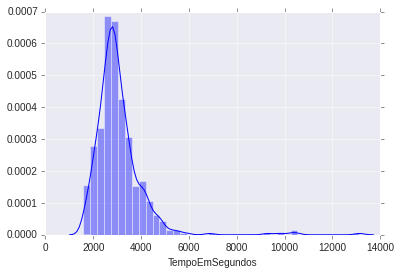

In [52]:
sns.set_style('darkgrid')
sns.distplot(df['TempoEmSegundos'], bins=40)

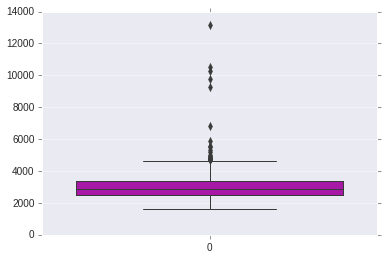

In [53]:
fig = sns.boxplot( palette=["m", "g"], data=df['TempoEmSegundos'])
fig

In [54]:
df['TempoEmSegundos'] > 7200

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
466    False
467    False
468    False
469    False
470    False
471    False
472    False
473    False
474    False
475    False
476    False
477    False
478    False
479    False
480    False
481    False
482    False
483    False
484    False
485    False
486    False
487    False
488    False
489    False
490    False
491     True
492     True
493     True
494     True
495     True
Name: TempoEmSegundos, Length: 496, dtype: bool

In [55]:
df.tail()

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
491,492.0,2469,F,F60/64,13,9288,154.48
492,493.0,2093,M,M45/49,35,9793,163.13
493,494.0,2291,F,F35/39,29,10276,171.16
494,495.0,2550,F,F35/39,30,10504,175.04
495,496.0,2493,M,M35/39,53,13133,218.53


In [56]:
df.tail(20)

,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
476,477.0,2405,F,F35/39,27,4730,78.50
477,478.0,2164,F,F30/34,17,4732,78.52
478,479.0,2542,M,M50/54,33,4749,79.09
479,480.0,2540,M,M25/29,31,4776,79.36
480,481.0,2216,F,F25/29,15,4792,79.52
481,482.0,2318,M,M35/39,52,4825,80.25
482,483.0,2097,M,M70+,7,4887,81.27
483,484.0,2415,F,F45/49,19,4941,82.21
484,485.0,2118,F,F50/54,23,5033,83.53
485,486.0,2200,M,M55/59,19,5217,86.57


In [0]:
df_fem = df[df['Sx'] == 'F']
df_fem = df_fem.reset_index()

df_mas = df[df['Sx'] == 'M']
df_mas = df_mas.reset_index()

In [58]:
df_fem.tail()

,index,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
175,489,490.0,2170,F,F40/44,29,5905,98.25
176,490,491.0,2413,F,F60/64,12,6854,114.14
177,491,492.0,2469,F,F60/64,13,9288,154.48
178,493,494.0,2291,F,F35/39,29,10276,171.16
179,494,495.0,2550,F,F35/39,30,10504,175.04


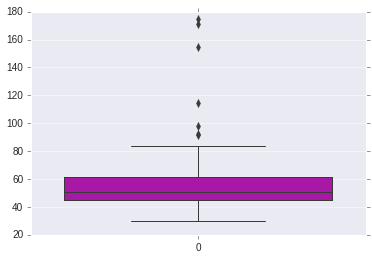

In [59]:
sns.boxplot(palette=["m", "g"], data=df_fem['TempoEmMinutos'])

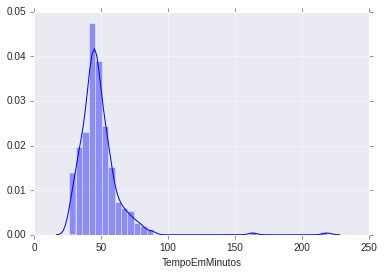

In [60]:
sns.set_style('darkgrid')
sns.distplot(df_mas['TempoEmMinutos'], bins=40)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


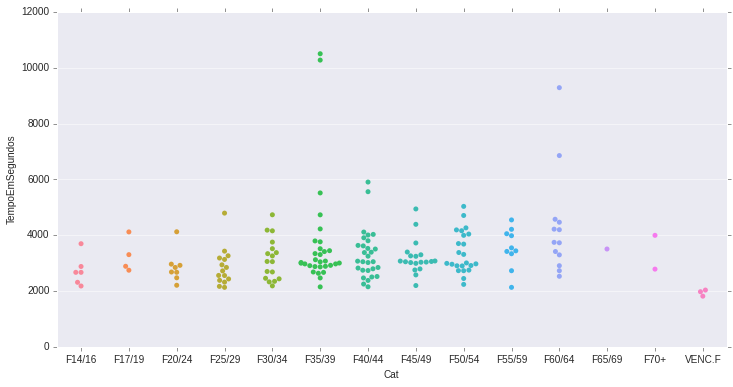

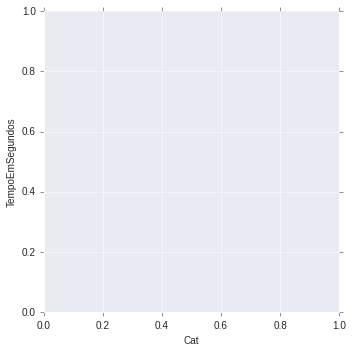

In [61]:
cats = sorted(list(df_fem['Cat'].unique()))
f, ax = plt.subplots(figsize=(12, 6))
plot = sns.catplot(x="Cat", y="TempoEmSegundos", kind="swarm", order=cats, data=df_fem, ax=ax)
plot

In [62]:
df_mas.head()

,index,Col,Num,Sx,Cat,Col.Cat,TempoEmSegundos,TempoEmMinutos
0,0,1.0,2556,M,VENC.M,1,1596,26.36
1,1,2.0,2127,M,VENC.M,2,1624,27.04
2,2,3.0,2158,M,VENC.M,3,1657,27.37
3,3,4.0,2131,M,M30/34,1,1668,27.48
4,4,5.0,2300,M,M14/16,1,1671,27.51


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


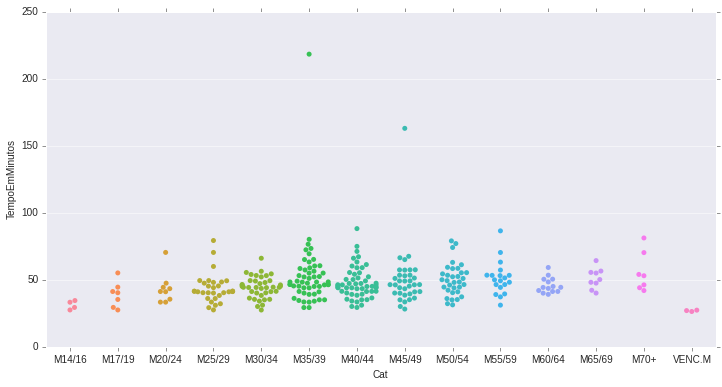

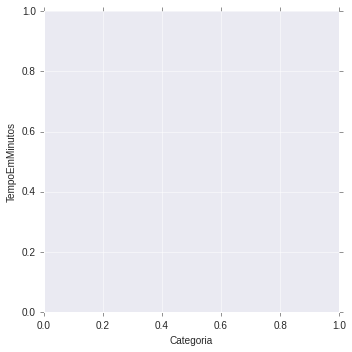

In [63]:
cats = sorted(list(df_mas['Cat'].unique()))

f, ax = plt.subplots(figsize=(12,6))
plot = sns.catplot(x="Cat", y="TempoEmMinutos", kind="swarm", order=cats, data=df_mas, ax=ax)
plot.set_xlabels("Categoria")
plot

In [0]:
df_mas['Categoria'] = df_mas['Cat'].apply(lambda s: s if s.startswith('V') else s[1:])
df_fem['Categoria'] = df_fem['Cat'].apply(lambda s: s if s.startswith('V') else s[1:])

In [65]:
challange_mas_grouped = df_mas.groupby(['Categoria']).agg({'TempoEmMinutos': ['size','mean']})
challange_fem_grouped = df_fem.groupby(['Categoria']).agg({'TempoEmMinutos': ['size','mean']})
challange_mas_grouped

TempoEmMinutos           
                    size       mean
Categoria                          
14/16                  4  31.177500
17/19                  7  39.092857
20/24                  9  43.391111
25/29                 31  43.601613
30/34                 39  44.488974
35/39                 53  52.840000
40/44                 53  47.704151
45/49                 35  50.253143
50/54                 33  50.243939
55/59                 19  51.264211
60/64                 14  45.957857
65/69                  9  51.092222
70+                    7  55.867143
VENC.M                 3  26.923333

In [0]:
challange_mas_grouped.rename(columns={'size':'Qtd(M)','mean':'Tempo media(M)'},inplace=True)
challange_fem_grouped.rename(columns={'size':'Qtd(F)','mean':'Tempo media(F)'},inplace=True)

df_new = pd.concat([challange_mas_grouped, challange_fem_grouped], axis=1)
df_new.columns = df_new.columns.droplevel(0)

df_new['Qtd(M)'] = df_new['Qtd(M)'].fillna(0.0).astype(int)
df_new['Qtd(F)'] = df_new['Qtd(F)'].fillna(0.0).astype(int)

df_new['Tempo media(M)'] = df_new['Tempo media(M)'].fillna(0.0).astype(int)
df_new['Tempo media(F)'] = df_new['Tempo media(F)'].fillna(0.0).astype(int)


In [0]:
total = 591
completaram = df.shape[0]
percent_compl = round(completaram / total * 100,2)

In [0]:
group_sx = df['Sx'].value_counts()
qtd_masc = group_sx[0]
qtd_fem = group_sx[1]
percent_masc = round(qtd_masc / total * 100,2)
percent_fem = round(qtd_fem / total * 100,2)

In [75]:
df['TempoEmMinutos'].mean().round(2)

50.75

In [76]:
df_tempo = df.groupby('Sx')['TempoEmMinutos'].mean().round(2)
tempo_media_masc = df_tempo[1]
tempo_media_fem  = df_tempo[0]
tempo_geral = df['TempoEmMinutos'].mean().round(2)

tempo_media_fem

55.56

In [77]:
print(f"Prova Classic - 2.0 km - Copacabana - 22/12/2018")
print(f"Participantes: {total} / Completaram: {completaram} ({percent_compl}%)")
print(f"Qtd por sexo: {qtd_fem} ({percent_fem}%) (F) / {qtd_masc} ({percent_masc}%) (M)")
print(f"Tempo media (Minutos): {tempo_media_fem} (F) / {tempo_media_masc} (M), {tempo_geral} (Geral)")
print()
print("Por categoria, dividido entre homens (M) e mulheres (F)")
df_new

Prova Classic - 2.0 km - Copacabana - 22/12/2018
Participantes: 591 / Completaram: 496 (83.93%)
Qtd por sexo: 180 (30.46%) (F) / 316 (53.47%) (M)
Tempo media (Minutos): 55.56 (F) / 48.01 (M), 50.75 (Geral)

Por categoria, dividido entre homens (M) e mulheres (F)


,Qtd(M),Tempo media(M),Qtd(F),Tempo media(F)
14/16,4,31,6,45
17/19,7,39,4,54
20/24,9,43,8,47
25/29,31,43,15,47
30/34,39,44,17,52
35/39,53,52,30,61
40/44,53,47,29,55
45/49,35,50,19,53
50/54,33,50,23,56
55/59,19,51,10,58
